#                                           Assignment 1

### Declaring all the necessary inbuilt modules.

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt

### Loading the input Data.

In [2]:
#df=pd.read_csv(r'H:\Documents\Documents\MS\Updated Resume\SUNY BUFFALO\CSE 574\Assignment 1\diabetes.csv')
df=pd.read_csv('diabetes.csv') #Reading the csv file consisting of all features, it's input and the actual output. 

X = df.iloc[:,:8].values #Segregating all feautures from the output classification.
Y = df.iloc[:,-1:].values #Output classification 0 or 1.


#Splitting the data into 3 parts: Training - 60%, Test - 20%, Val - 20%.
X_Train,X_Test,Y_Train,Y_Test=ms.train_test_split(X, Y, test_size=0.2, random_state=1)
X_Train,X_Val,Y_Train,Y_Val=ms.train_test_split(X_Train, Y_Train, test_size=0.25, random_state=1)


#Normalizing the input data.
ss=StandardScaler()
X_Train=ss.fit_transform(X_Train)
X_Test=ss.transform(X_Test)
X_Val=ss.transform(X_Val)

### Part 1 -- Logistic Regression --  Implementing the functionality of logistic regression.


Logistic Regression Implementation.





Error plot for Logistic Regression is obtained as below.


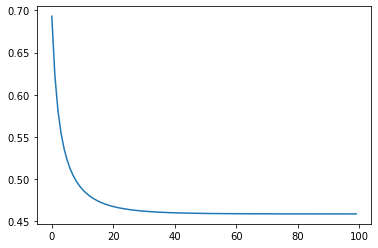




Logistic Regression --- Graph comparing the actual and estimated output values for Test input data is shown below.


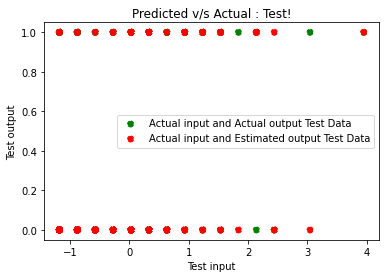




Logistic Regression --- Graph comparing the actual and estimated output values for Val input data is shown below.


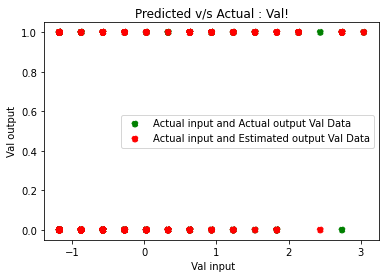



Accuracy achieved by the Logistic Regression model on Test set :  77.92 %
Error rate determined by the Logistic Regression model on Test set :  22.08 %

Accuracy achieved by the Logistic Regression model on Val set :  75.97 %
Error rate determined by the Logistic Regression model on Val set :  24.03 %


In [3]:

#Class LogReg defined to implement Logistic Regression.
class LogReg():
    def __init__(self,Learningrate,iterations):
        self.Learningrate=Learningrate
        self.iterations=iterations
    

    #Function that trains the data by updating weights w and bias b.
    def TrainData(self,X_Train,Y_Train):
                
        #Initialzing all variables.
        self.X_Train=X_Train
        self.Y_Train=Y_Train
        self.r,self.c=self.X_Train.shape
        self.w=np.zeros(self.c)
        self.b=0
        self.dz=0
        self.cost=[]
        self.Y_Train=self.Y_Train.reshape(1, (self.Y_Train.shape[0]))
        
        
        #Running te loop for given number of iterations/ epochs.Performing the sigmoid operation and error minimization task.
        for i in range(self.iterations):
            
            #print("\n Iteration no : \n", i)
            self.weight_updation() #calling the weight_updation function.
            
            dw=(1/self.c)*np.dot(self.X_Train.T,self.dz.T)
            db=(1/self.c)*np.sum(self.dz)
            
            #Updating weight and bias values.
            self.w=self.w-self.Learningrate*dw
            self.b-=self.Learningrate*db

        print("\n\n\nError plot for Logistic Regression is obtained as below.")

        plt.plot(self.cost)
        plt.show()
        
        return self  
    
    
    
    
    #Function to calculate sigmoid and loss values. 
    def weight_updation(self):

        z=np.dot(np.transpose(self.w), np.transpose(self.X_Train))+self.b
        
        p=self.Sigmoid(z) # calling the sigmoid function.
        self.cost.append(self.Loss(p)) # calling the loss/error function and appneding the output to cost variable.

        self.dz=p-self.Y_Train
        self.dz=np.reshape(self.dz, self.r)

        return self
    
    
    
    
    #Function returning the sigmoid value.
    def Sigmoid(self,k):
        sigma=1/(1+np.exp(-k))
        return sigma
        
    
    
    
    #Function returning cost.
    def Loss(self, p):
        k=-(np.log(p))*(self.Y_Train) - (1-self.Y_Train)*(np.log(1-p))   
        return k.mean()
    
    
    
    
    #Function returning the predicted output, given the set of inputs.
    def predict(self,X_pred):
        z=np.dot(self.w, X_pred.T)+self.b
        sigma=1/(1+np.exp(-z))
        Y_pred=np.where(sigma>0.5,1,0) #Return 1 if value of sigmoid expression is greater than 0.5 else return 0.
        return Y_pred

    


    
def main():
    
    
    print("\nLogistic Regression Implementation.\n\n")


    #Creating the class "LogReg" and initializing the variables - learning rate and iterations (epoch).
    lg=LogReg(Learningrate=0.01, iterations=100)
    lg.TrainData(X_Train,Y_Train) #calling the function to train the data by updating weights and bias.

    
    #Predicitng the output/ classification for test and val input data using the updated weights.
    Test_pred=lg.predict(X_Test)
    Val_pred=lg.predict(X_Val)
    
    
    
    
    #Estimating the accuracy and it's corresponding error rate for Test and Val.
    size=np.size(Test_pred)   
    Test_classified_correct, Test_classified_incorrect, Val_classified_correct, Val_classified_incorrect = 0, 0, 0, 0


    for count in range(size) :  
        if(Y_Test[count] == Test_pred[count]):            
            Test_classified_correct += 1  #where estimated and actual output values are same in Test data.
            
        else:
            Test_classified_incorrect+=1  #where estimated and actual output values are dissimilar in Test data.

        if(Y_Val[count] == Val_pred[count]):            
            Val_classified_correct += 1  #where estimated and actual output values are equal in Val data.
            
        else:
            Val_classified_incorrect+=1  #where estimated and actual output values are dissimilar in Val data.

        count = count + 1

    
    #Accuracy and error rate for Test input data.
    Test_Accuracy = ( Test_classified_correct / size ) * 100 
    Test_Error_rate = (Test_classified_incorrect / size ) * 100
    
    #Accuracy and error rate for Val input data.
    Val_Accuracy = ( Val_classified_correct / size ) * 100 
    Val_Error_rate = (Val_classified_incorrect / size ) * 100
    


    #Plotting the graph comparing thhe actual and estimated output values for test input data.
    plt.scatter(X_Test[:,0], Y_Test, color='green', linestyle='dashed', label='Actual input and Actual output Test Data')
    plt.scatter(X_Test[:,0], Test_pred, color='red', linestyle='dashed', label='Actual input and Estimated output Test Data')

    plt.xlabel('Test input')
    plt.ylabel('Test output')
    plt.title('Predicted v/s Actual : Test!')
    plt.legend()
    print("\n\n\nLogistic Regression --- Graph comparing the actual and estimated output values for Test input data is shown below.")
    plt.show()
    
    
    
    #Plotting the graph comparing thhe actual and estimated output values for Val input data.
    plt.scatter(X_Val[:,0], Y_Val, color='green', linestyle='dashed', label='Actual input and Actual output Val Data')
    plt.scatter(X_Val[:,0], Val_pred, color='red', linestyle='dashed', label='Actual input and Estimated output Val Data')

    plt.xlabel(' Val input')
    plt.ylabel('Val output')
    plt.title('Predicted v/s Actual : Val!')
    plt.legend()
    print("\n\n\nLogistic Regression --- Graph comparing the actual and estimated output values for Val input data is shown below.")
    plt.show()

        
    
    #Displaying the Accuracy and error rates for both Test and Val data.
    print( "\n\nAccuracy achieved by the Logistic Regression model on Test set : ", round(Test_Accuracy,2), "%" )
    print( "Error rate determined by the Logistic Regression model on Test set : ", round(Test_Error_rate,2), "%" )
    print( "\nAccuracy achieved by the Logistic Regression model on Val set : ", round(Val_Accuracy,2), "%" )
    print( "Error rate determined by the Logistic Regression model on Val set : ", round(Val_Error_rate,2), "%" )

    
    
#Calling the Main function.
if __name__=="__main__":
    main()
    

### Part 2 -- Neural Networks -- Implementing the functionality of Neural Networks using L1-Regularization.


Neural Network Implentation.


Changes in Loss and Accuracy as the no of iterations progress is seen as below:
 
Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 1.1424 - accuracy: 0.5543 - val_loss: 1.1561 - val_accuracy: 0.6494
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1112 - accuracy: 0.6609 - val_loss: 1.1298 - val_accuracy: 0.6623
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0841 - accuracy: 0.6630 - val_loss: 1.1072 - val_accuracy: 0.6623
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0606 - accuracy: 0.6696 - val_loss: 1.0871 - val_accuracy: 0.6688
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0396 - accuracy: 0.6739 - val_loss: 1.0694 - val_accuracy: 0.6558
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0207 - accuracy: 0.6913 - val_loss: 1.0533 - val_accuracy: 0.6558
Epoch 7/100
16/16 [====================

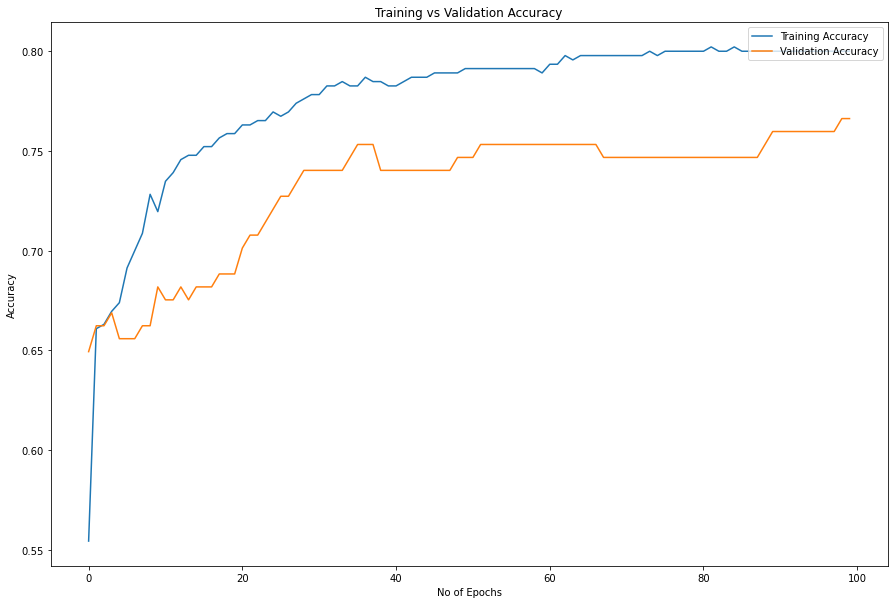





The training and validation loss as seen in the Neural Network model is as follows:



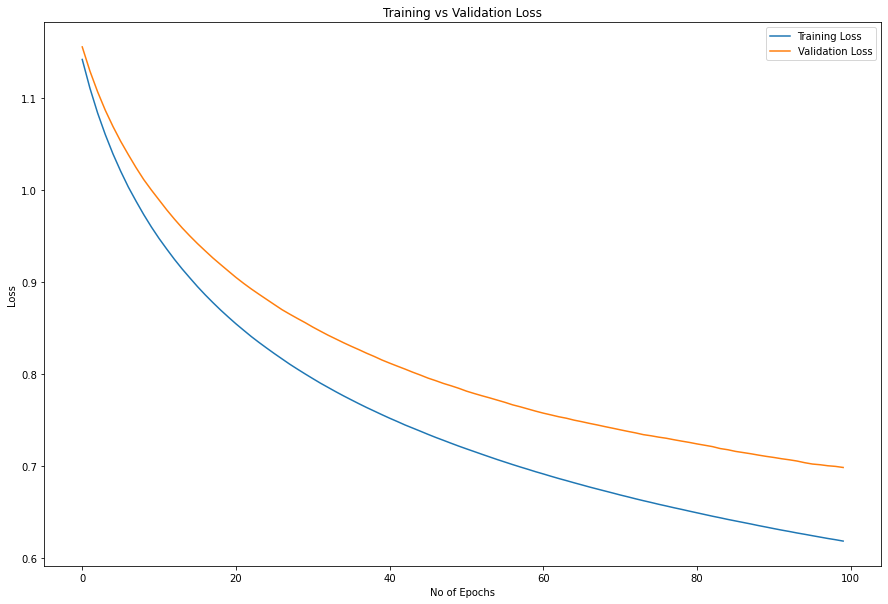

In [4]:

# Defining a 3-layer neural network with 2 hidden layers and one output layer.
model = Sequential()
model.add(Dense(220, input_dim=8, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(400, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model to define loss, optimizer and metrics parameters.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training the neural network.
print("\nNeural Network Implentation.")
print("\n\nChanges in Loss and Accuracy as the no of iterations progress is seen as below:\n ")
history=model.fit(X_Train, Y_Train, validation_data = (X_Val,Y_Val), epochs=100, batch_size=30)


# Predicitng and evaluating the performance of te model using Test and Val dataset.
Test_loss, Test_accuracy = model.evaluate(X_Test, Y_Test)
Val_loss, Val_accuracy = model.evaluate(X_Val, Y_Val)



#Displaying the Accuracy and error rates for both Test and Val data.
print( "\n\nAccuracy achieved by the Neural Network model on Test set : ", round(Test_accuracy*100,2), "%" )
print( "Error rate determined by the Neural Network model on Test set : ", round(Test_loss*100,2), "%" )
print( "\nAccuracy achieved by the Neural Network model on Val set : ", round(Val_accuracy*100,2), "%" )
print( "Error rate determined by the Neural Network model on Val set : ", round(Val_loss*100,2), "%" )




# Plotting the graph between Training and Validation Accuracy.
print("\n\n\nThe training and validation accuracy as seen in the Neural Network model is as follows:\n")
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Plotting the graph between Training and Validation Accuracy.
print("\n\n\n\nThe training and validation loss as seen in the Neural Network model is as follows:\n")
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

### Part 3 --  Comparing the Implementation of Neural Networks using L1 Regularization and Dropout.


Neural Network Implentation using L1-Regularization.


Changes in Loss and Accuracy as the no of iterations progress is seen as below:
 
Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 1.1240 - accuracy: 0.6457 - val_loss: 1.1418 - val_accuracy: 0.6429
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0939 - accuracy: 0.6891 - val_loss: 1.1154 - val_accuracy: 0.6818
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0682 - accuracy: 0.6913 - val_loss: 1.0926 - val_accuracy: 0.6753
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0457 - accuracy: 0.6891 - val_loss: 1.0730 - val_accuracy: 0.6753
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0254 - accuracy: 0.6870 - val_loss: 1.0557 - val_accuracy: 0.6753
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0075 - accuracy: 0.6957 - val_loss: 1.0400 - val_accuracy: 0.6948
Epoch 7/100
16/

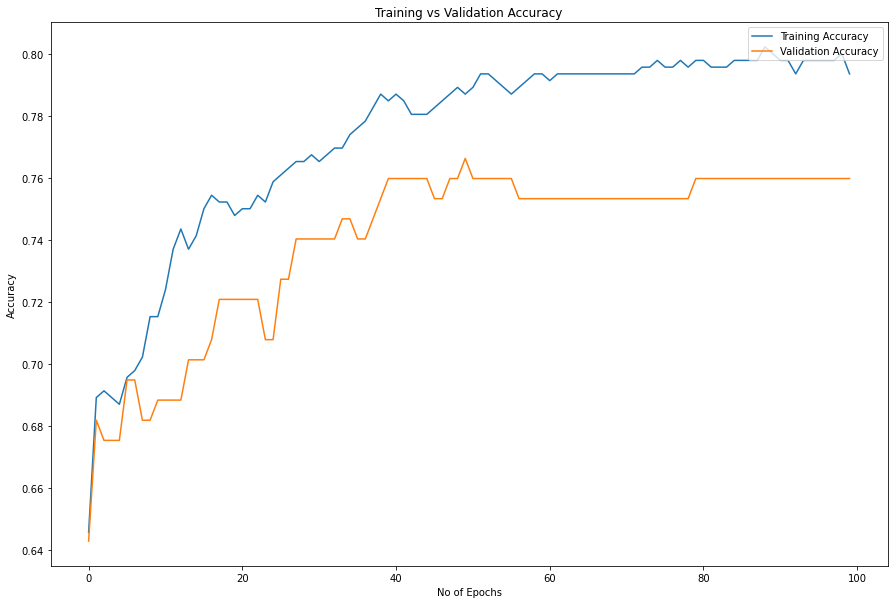





The training and validation loss as seen in the Neural Network model using L1 is as follows:



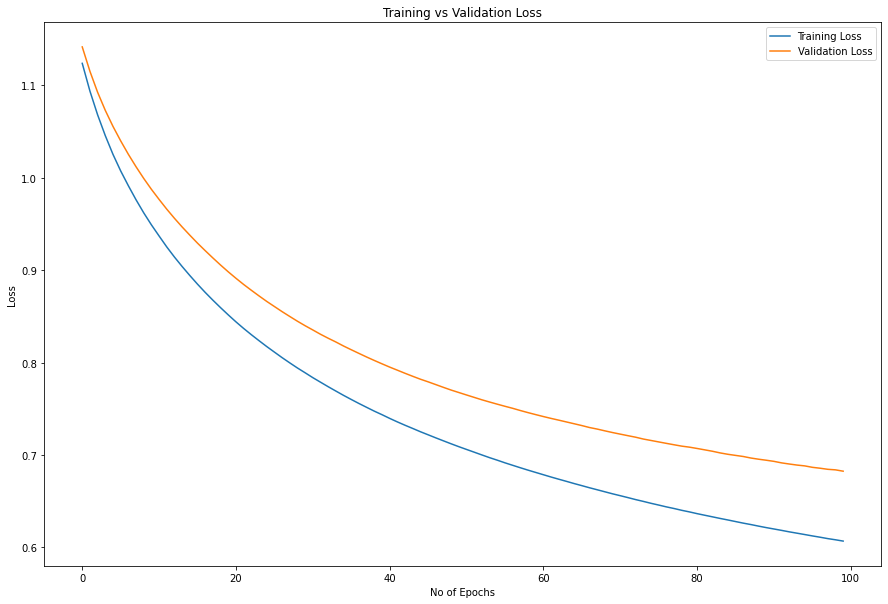


####################################################################################################




Neural Network Implentation using Dropout.


Changes in Loss and Accuracy as the no of iterations progress is seen as below:
 
Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 1.1397 - accuracy: 0.6478 - val_loss: 1.1470 - val_accuracy: 0.6623
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.1098 - accuracy: 0.6543 - val_loss: 1.1214 - val_accuracy: 0.6558
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1.0835 - accuracy: 0.6565 - val_loss: 1.0983 - val_accuracy: 0.6558
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0599 - accuracy: 0.6565 - val_loss: 1.0778 - val_accuracy: 0.6558
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0387 - accuracy: 0.6609 - val_loss: 1.0596 - val_accuracy: 0.6623
Epoch 6/100
16/16 [==============================] - 0s 4ms/s

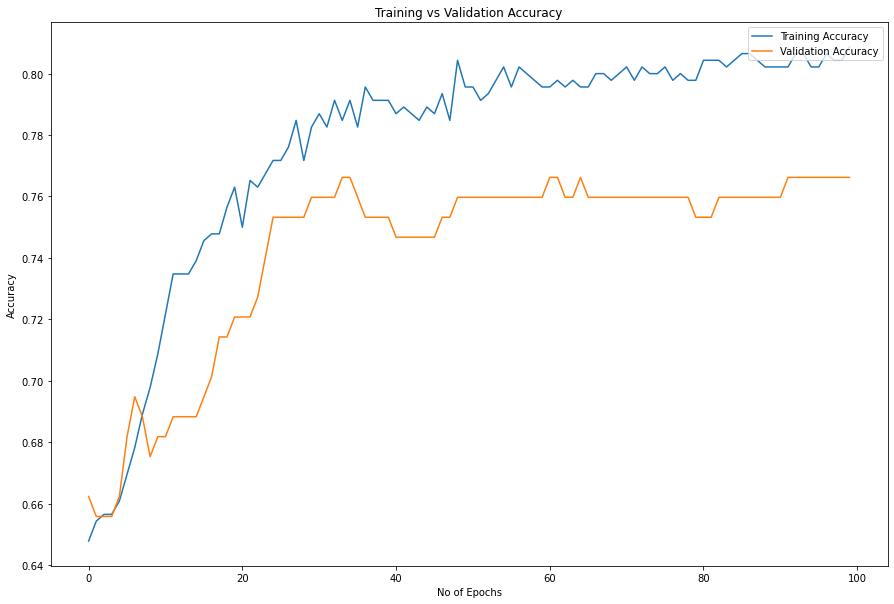





The training and validation loss as seen in the Neural Network model using Dropout is as follows:



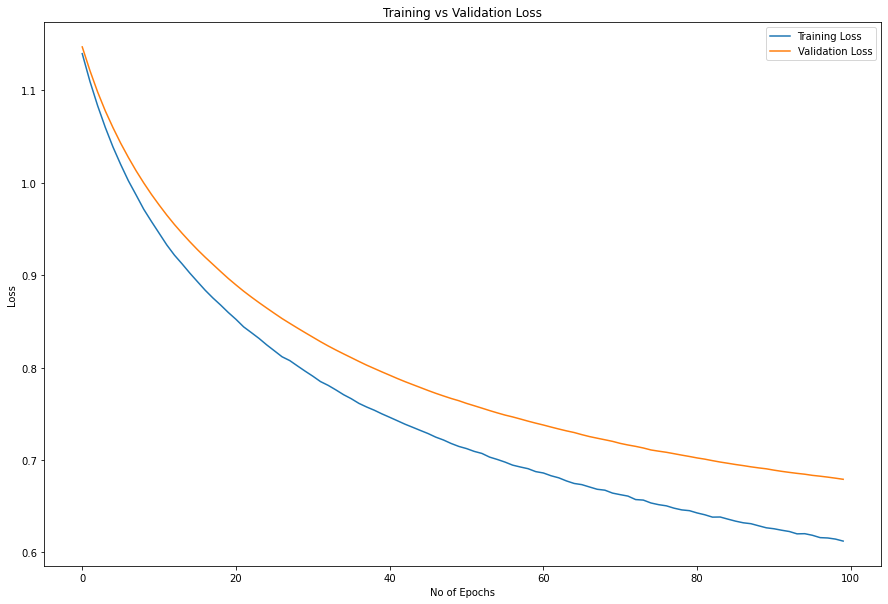

In [5]:

##Neural Network Using L1 Regularization.


# Defining a 3-layer neural network with 2 hidden layers and one output layer.
model = Sequential()
model.add(Dense(220, input_dim=8, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(400, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model to define loss, optimizer and metrics parameters.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training the neural network.
print("\nNeural Network Implentation using L1-Regularization.")
print("\n\nChanges in Loss and Accuracy as the no of iterations progress is seen as below:\n ")

history=model.fit(X_Train, Y_Train, validation_data = (X_Val,Y_Val), epochs=100, batch_size=30)

# Predicitng and evaluating the performance of te model using Test and Val dataset.
Test_loss, Test_accuracy = model.evaluate(X_Test, Y_Test)
Val_loss, Val_accuracy = model.evaluate(X_Val, Y_Val)


#Displaying the Accuracy and error rates for both Test and Val data.
print("\n\n\nPerformance Metrics using L1-Regularization:")
print( "\nAccuracy achieved by the Neural Network model on Test set : ", round(Test_accuracy*100,2), "%" )
print( "Error rate determined by the Neural Network model on Test set : ", round(Test_loss*100,2), "%" )
print( "\nAccuracy achieved by the Neural Network model on Val set : ", round(Val_accuracy*100,2), "%" )
print( "Error rate determined by the Neural Network model on Val set : ", round(Val_loss*100,2), "%" )




# Plotting the graph between Training and Validation Accuracy.
print("\n\n\nThe training and validation accuracy as seen in the Neural Network model using L1 is as follows:\n")
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Plotting the graph between Training and Validation Accuracy.
print("\n\n\n\nThe training and validation loss as seen in the Neural Network model using L1 is as follows:\n")
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()



print("\n####################################################################################################\n")



##Neural Network Using DROPOUT.

# Defining a 3-layer neural network with 2 hidden layers and one output layer.
model1 = Sequential()
model1.add(Dense(220, input_dim=8, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model1.add(Dropout(0.01))
model1.add(Dense(400, activation='relu', activity_regularizer=keras.regularizers.l1(0.01)))
model1.add(Dropout(0.01))
model1.add(Dense(1, activation='sigmoid'))

# Compiling the model to define loss, optimizer and metrics parameters.
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Training the neural network.
print("\n\n\nNeural Network Implentation using Dropout.")
print("\n\nChanges in Loss and Accuracy as the no of iterations progress is seen as below:\n ")
history1=model1.fit(X_Train, Y_Train, validation_data = (X_Val,Y_Val), epochs=100, batch_size=30)


# Predicitng and evaluating the performance of te model using Test and Val dataset.
Test_loss1, Test_accuracy1 = model1.evaluate(X_Test, Y_Test)
Val_loss1, Val_accuracy1 = model1.evaluate(X_Val, Y_Val)



#Displaying the Accuracy and error rates for both Test and Val data.
print("\n\n\nPerformance Metrics using Dropout:")
print( "\nAccuracy achieved by the Neural Network model on Test set : ", round(Test_accuracy1*100,2), "%" )
print( "Error rate determined by the Neural Network model on Test set : ", round(Test_loss1*100,2), "%" )
print( "\nAccuracy achieved by the Neural Network model on Val set : ", round(Val_accuracy1*100,2), "%" )
print( "Error rate determined by the Neural Network model on Val set : ", round(Val_loss1*100,2), "%" )




# Plotting the graph between Training and Validation Accuracy.
print("\n\n\nThe training and validation accuracy as seen in the Neural Network model using Dropout is as follows:\n")
plt.figure(figsize=(15, 10))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No of Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

# Plotting the graph between Training and Validation Accuracy.
print("\n\n\n\nThe training and validation loss as seen in the Neural Network model using Dropout is as follows:\n")
plt.figure(figsize=(15, 10))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('No of Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()